In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Compared with classification model data and regression model data, I find out the classification model data variant is higher and easier for us to analyze so choose it as data_2024.

In [2]:
import pandas as pd
# Load the 2024 input data
data_2024 = pd.read_csv('/content/drive/My Drive/classification_2024_data.csv')

Calculate the feature importance of each independent variables CR2, CR3, CR5, and each combined feature CR2_CR3, CR2_CR5, CR3_CR5, CR2_CR3_CR5 for each dependent variables.

I find out that CR5, CR2_CR5, CR3_CR5, CR2_CR3_CR5 have larger feature importance value for the dependent variables. Therefore, I will focus on these race features to do data analysis first and then future analyze the grade feature and gender feature.

In [3]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

available_targets = ['CR7', 'CR11', 'CR12', 'CR13', 'CR21', 'CR22', 'CR23', 'CR54', 'CR56']
df_cleaned = data_2024[['CR2', 'CR3', 'CR5'] + available_targets].dropna(subset=['CR2', 'CR3', 'CR5'])

# created combined feature
df_cleaned['CR2_CR3'] = df_cleaned['CR2'] * df_cleaned['CR3']
df_cleaned['CR2_CR5'] = df_cleaned['CR2'] * df_cleaned['CR5']
df_cleaned['CR3_CR5'] = df_cleaned['CR3'] * df_cleaned['CR5']
df_cleaned['CR2_CR3_CR5'] = df_cleaned['CR2'] * df_cleaned['CR3'] * df_cleaned['CR5']

# Independent variables: CR2 (gender), CR3 (grade), CR5 (race) and combined feature
X_combined = df_cleaned[['CR2', 'CR3', 'CR5', 'CR2_CR3', 'CR2_CR5', 'CR3_CR5', 'CR2_CR3_CR5']]
feature_importances_combined = {}

for target in available_targets:
    # Dependent variable: target CR7 to CR56
    y = df_cleaned[target]

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.3, random_state=42)

    # Train a Random Forest classifier
    clf = RandomForestClassifier(random_state=42)
    clf.fit(X_train, y_train)

    # Store feature importances for each target variable
    feature_importances_combined[target] = clf.feature_importances_

# Convert feature importances into a DataFrame for easier visualization
importance_df_combined = pd.DataFrame(feature_importances_combined, index=['CR2 (Gender)', 'CR3 (Grade)', 'CR5 (Race)',
                                                                          'CR2_CR3', 'CR2_CR5', 'CR3_CR5', 'CR2_CR3_CR5'])

print("Feature Importance for Combined and Interaction Terms for Each Dependent Variable:")
print(importance_df_combined)



Feature Importance for Combined and Interaction Terms for Each Dependent Variable:
                   CR7      CR11      CR12      CR13      CR21      CR22  \
CR2 (Gender)  0.027979  0.042475  0.048329  0.079141  0.027874  0.167979   
CR3 (Grade)   0.084575  0.119373  0.070141  0.134541  0.141038  0.060825   
CR5 (Race)    0.161287  0.206216  0.109380  0.136333  0.205069  0.102237   
CR2_CR3       0.125814  0.108755  0.096185  0.110735  0.045299  0.086101   
CR2_CR5       0.173522  0.159764  0.226925  0.204294  0.096054  0.308725   
CR3_CR5       0.182549  0.208576  0.202337  0.151938  0.329870  0.122493   
CR2_CR3_CR5   0.244275  0.154841  0.246703  0.183019  0.154796  0.151640   

                  CR23      CR54      CR56  
CR2 (Gender)  0.037527  0.050433  0.038689  
CR3 (Grade)   0.157093  0.058827  0.124916  
CR5 (Race)    0.087225  0.145104  0.153165  
CR2_CR3       0.136023  0.053922  0.127350  
CR2_CR5       0.151888  0.318250  0.206630  
CR3_CR5       0.219074  0.158300  0.19

My race map is {'Indian': 1, 'Asian': 2, 'Black': 3, 'Hawaii': 4, 'White': 5, 'Hispanic':6, 'Two race': 7}. Based on the obersvation, Hawaii and Asian race have very less people in each year and it is difficult to get insights from very small amount of people. So I decided to ignore them.


Dependent variable:

CR7: Have you ever tried cigarette smoking, even one or two puffs?
  1. Yes.
  2. No

This plot shows the percentage of respondents from each race (y-axis) who selected "1" for the question CR7 over the years 2012, 2014, 2016, and 2024 (x-axis).

X-axis: Represents the years.

Y-axis: Shows the percentage of people from each race who chose "1", calculated as the number of "1" selections divided by the total respondents from that race in a given year.

Lines: Each line on the graph represents a different race (e.g., Black, White, Asian), and the movement of the line across the years shows how the selection rate (i.e., the percentage of people choosing "1") has changed for that race across the four years.

For example, if the line for "White" respondents rises from 2012 to 2016, it indicates a higher proportion of White respondents selected "1" in 2016 compared to 2012

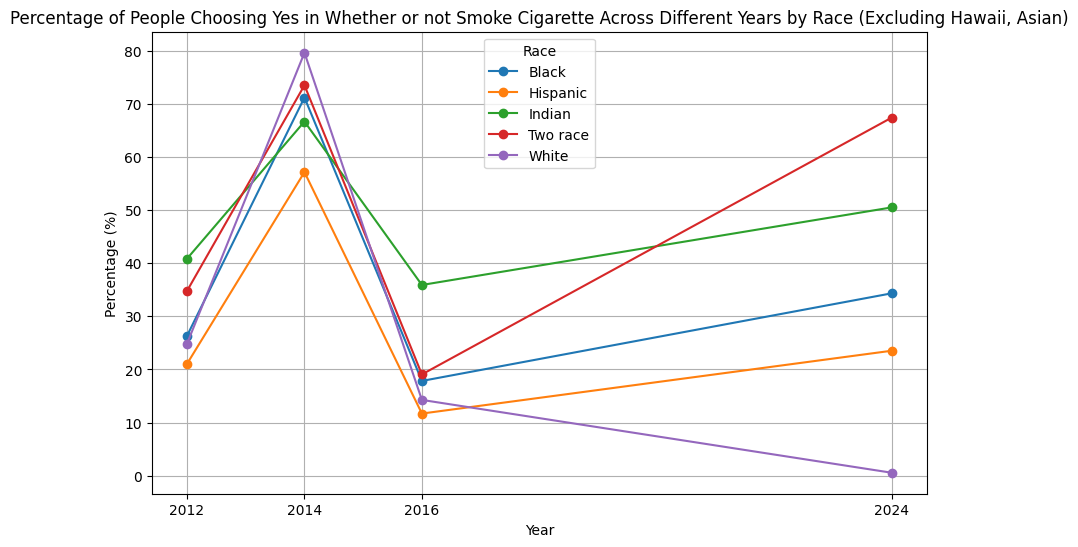

In [4]:
import matplotlib.pyplot as plt
def merge_cr5(row):
    cr5_cols = ['CR5A', 'CR5B', 'CR5C', 'CR5D', 'CR5E']
    cr5_flags = [1, 2, 3, 4, 5]
    cr5_values = [not pd.isna(row[col]) for col in cr5_cols]  # generates a Boolean list indicating whether each column has a value

    if sum(cr5_values) > 1:  # 7 represents two or more races
        return 7
    elif row['CR4'] in [2, 3, 4, 5] and any(cr5_values):
        return 7
    elif sum(cr5_values) == 1:
        return cr5_flags[cr5_values.index(True)]
    elif row['CR4'] in [2, 3, 4, 5]:
        return 6
    else:
        return None


data_2012 = pd.read_excel('/content/drive/My Drive/Alabama12_ms.xlsx')
data_2012 = data_2012.copy()
data_2012['CR5'] = data_2012.apply(merge_cr5, axis=1)

data_2014 = pd.read_excel('/content/drive/My Drive/Alabama14_ms.xlsx')
data_2014 = data_2014.copy()
data_2014['CR5'] = data_2014.apply(merge_cr5, axis=1)

data_2016 = pd.read_csv('/content/drive/My Drive/alabama16_6rigions_ms.sas7bdat.csv')
data_2016 = data_2016.copy()
data_2016['CR5'] = data_2016.apply(merge_cr5, axis=1)

# CR 7
data_2012_filtered = data_2012[['CR5', 'CR7']].dropna()
data_2014_filtered = data_2014[['CR5', 'CR7']].dropna()
data_2016_filtered = data_2016[['CR5', 'CR7']].dropna()
data_2024_filtered = data_2024[['CR5', 'CR7']].dropna()

data_2012_filtered['Year'] = 2012
data_2014_filtered['Year'] = 2014
data_2016_filtered['Year'] = 2016
data_2024_filtered['Year'] = 2024
combined_data = pd.concat([data_2012_filtered, data_2014_filtered, data_2016_filtered, data_2024_filtered])

# Race mapping
race_mapping = {1: 'Indian', 2: 'Asian', 3: 'Black', 4: 'Hawaii', 5: 'White', 6: 'Hispanic', 7: 'Two race'}
combined_data['CR5'] = combined_data['CR5'].map(race_mapping)
# Remove the 'Hawaii' and 'Asian' race from the data
combined_data_filtered = combined_data[(combined_data['CR5'] != 'Hawaii') & (combined_data['CR5'] != 'Asian')]

# Count the total number of people of each race in each year
total_per_race_year = combined_data_filtered.groupby(['CR5', 'Year']).size()

# Filter out the records with CR7 set to 1
df_cr7_1_filtered = combined_data_filtered[combined_data_filtered['CR7'] == 1]

# Calculate the number of people of each race who choose 1 in each year as a percentage of the total number of people of that race
percentage_by_race_year_filtered = df_cr7_1_filtered.groupby(['CR5', 'Year']).size() / total_per_race_year * 100
percentage_by_race_year_filtered = percentage_by_race_year_filtered.unstack().fillna(0)

plt.figure(figsize=(10, 6))
for race in percentage_by_race_year_filtered.index:
    plt.plot(percentage_by_race_year_filtered.columns, percentage_by_race_year_filtered.loc[race], marker='o', label=race)

plt.title('Percentage of People Choosing Yes in Whether or not Smoke Cigarette Across Different Years by Race (Excluding Hawaii, Asian)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.xticks([2012, 2014, 2016, 2024])
plt.legend(title='Race')
plt.grid(True)
plt.show()

CR21: Have you ever tried smoking cigars, cigarillos, or little cigars, even one or two puffs?
  1. yes
  2. no

This plot shows the percentage of respondents from each race (y-axis) who selected "1" for the question CR21 over the years 2012, 2014, 2016, and 2024 (x-axis).

X-axis: Represents the years.

Y-axis: Shows the percentage of people from each race who chose "1", calculated as the number of "1" selections divided by the total respondents from that race in a given year.

Lines: Each line on the graph represents a different race (e.g., Black, White, Asian), and the movement of the line across the years shows how the selection rate (i.e., the percentage of people choosing "1") has changed for that race across the four years.

For example, if the line for "White" respondents rises from 2012 to 2016, it indicates a higher proportion of White respondents selected "1" in 2016 compared to 2012

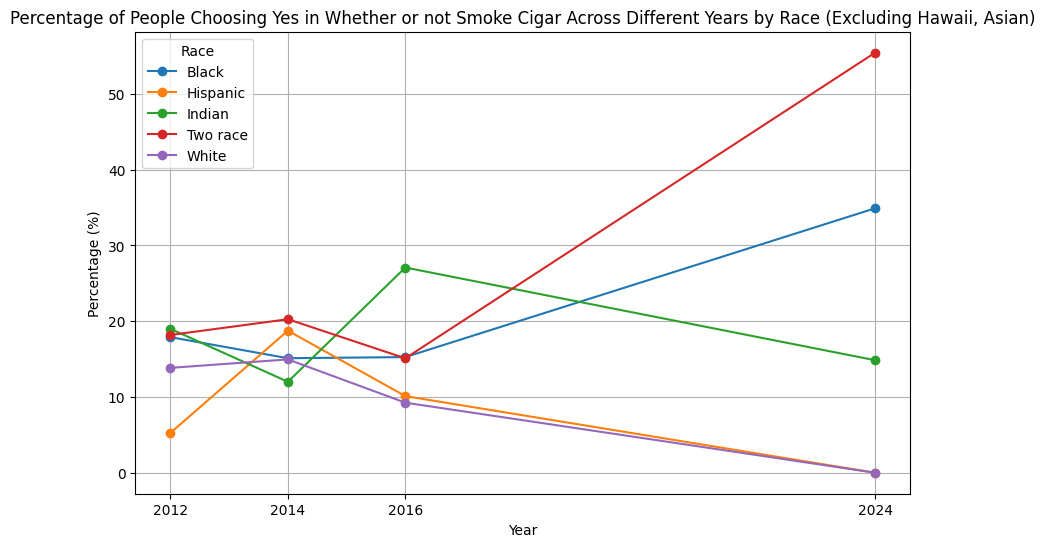

In [10]:
# CR 21
# Similar process to filter CR21 data and plot

# Filter CR21 data
data_2012_filtered_cr21 = data_2012[['CR5', 'CR21']].dropna()
data_2014_filtered_cr21 = data_2014[['CR5', 'CR21']].dropna()
data_2016_filtered_cr21 = data_2016[['CR5', 'CR21']].dropna()
data_2024_filtered_cr21 = data_2024[['CR5', 'CR21']].dropna()

data_2012_filtered_cr21['Year'] = 2012
data_2014_filtered_cr21['Year'] = 2014
data_2016_filtered_cr21['Year'] = 2016
data_2024_filtered_cr21['Year'] = 2024

combined_data_cr21 = pd.concat([data_2012_filtered_cr21, data_2014_filtered_cr21, data_2016_filtered_cr21, data_2024_filtered_cr21])

# Apply race mapping
combined_data_cr21['CR5'] = combined_data_cr21['CR5'].map(race_mapping)

# Remove Hawaii and Asian races
combined_data_filtered_cr21 = combined_data_cr21[(combined_data_cr21['CR5'] != 'Hawaii') & (combined_data_cr21['CR5'] != 'Asian')]

# Count the total number of people of each race in each year
total_per_race_year_cr21 = combined_data_filtered_cr21.groupby(['CR5', 'Year']).size()

# Filter out the records with CR21 set to 1
df_cr21_1_filtered = combined_data_filtered_cr21[combined_data_filtered_cr21['CR21'] == 1]

# Calculate the number of people of each race who choose 1 in each year as a percentage of the total number of people of that race
percentage_by_race_year_filtered_cr21 = df_cr21_1_filtered.groupby(['CR5', 'Year']).size() / total_per_race_year_cr21 * 100
percentage_by_race_year_filtered_cr21 = percentage_by_race_year_filtered_cr21.unstack().fillna(0)

# Plot the results for CR21
plt.figure(figsize=(10, 6))
for race in percentage_by_race_year_filtered_cr21.index:
    plt.plot(percentage_by_race_year_filtered_cr21.columns, percentage_by_race_year_filtered_cr21.loc[race], marker='o', label=race)

plt.title('Percentage of People Choosing Yes in Whether or not Smoke Cigar Across Different Years by Race (Excluding Hawaii, Asian)')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.xticks([2012, 2014, 2016, 2024])
plt.legend(title='Race')
plt.grid(True)
plt.show()


Based on the two above graphs, we can see the increase in the percentage of smoking cigaratte and cigars in black, two race. I choose to focus on the black race, two races to find out the reasons of their increase in the percentage of smoking cigaratte and cigars. The next step I will dig deeper into the specific questions CR11, CR12, CR13, CR23, CR54.

CR11: How old were you when you first tried cigarette smoking, even one or two puffs?
  1. I have never smoked cigarettes, not even one or two puffs.
  2. 8 years old or younger.
  3. 9 years old.
  4. 10 years old.
  5. 11 years old.
  6. 12 years old.
  7. 13 years old.
  8. 14 years old.
  9. 15 years old or later.

X-axis (Horizontal Axis): This represents the years, specifically 2012, 2014, 2016, and 2024. It shows the data for these four years, allowing us to track how different groups have changed over time.

Y-axis (Vertical Axis): The Y-axis shows the percentage of respondents. This percentage represents the proportion of people within a specific gender and race who selected a particular CR11 group (e.g., "9 years younger", "10-12 years", "13 years older"). The higher the percentage, the more people in that category chose the specific CR11 group.

Three lines in each chart:

9 years younger: Represents the respondents who selected values 2 or 3 in CR11.

10-12 years: Represents the respondents who selected values 4, 5, or 6 in CR11.

13 years older: Represents the respondents who selected values 7, 8, or 9 in CR11.

<ipython-input-28-ffe263543566>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_filtered_cr11['CR11_group'] = combined_data_filtered_cr11['CR11'].apply(categorize_cr11)


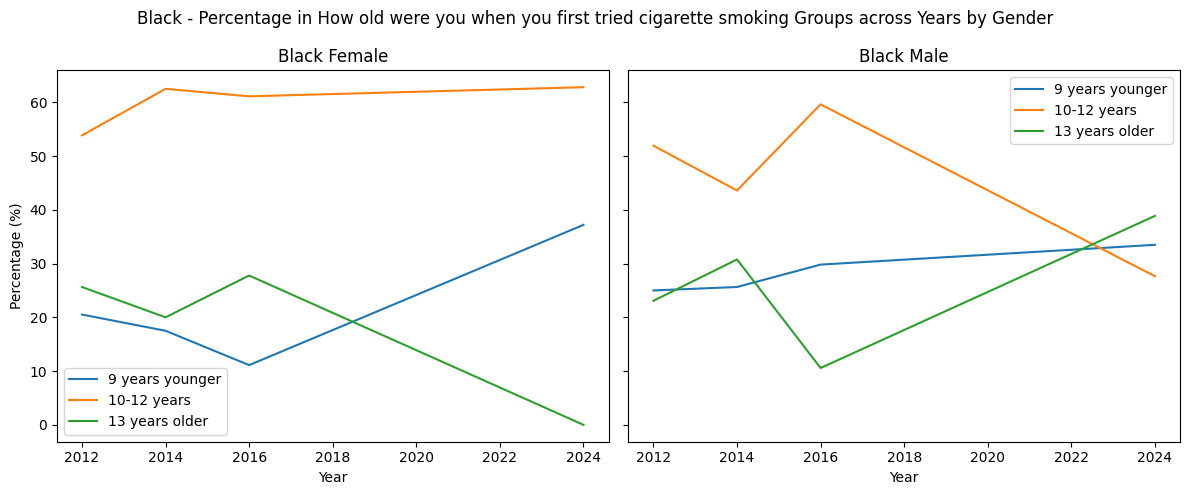

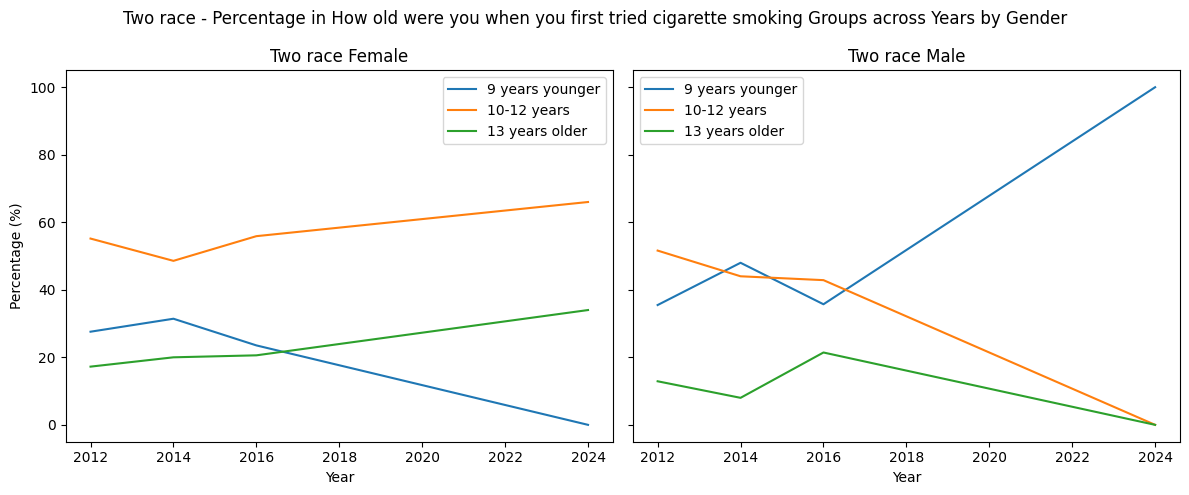

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter and process CR11 data
data_2012_filtered_cr11 = data_2012[['CR2', 'CR5', 'CR11']].dropna()
data_2014_filtered_cr11 = data_2014[['CR2', 'CR5', 'CR11']].dropna()
data_2016_filtered_cr11 = data_2016[['CR2', 'CR5', 'CR11']].dropna()
data_2024_filtered_cr11 = data_2024[['CR2', 'CR5', 'CR11']].dropna()

# Add year information for each dataset
data_2012_filtered_cr11['Year'] = 2012
data_2014_filtered_cr11['Year'] = 2014
data_2016_filtered_cr11['Year'] = 2016
data_2024_filtered_cr11['Year'] = 2024

# Combine all filtered datasets
combined_data_cr11 = pd.concat([data_2012_filtered_cr11, data_2014_filtered_cr11, data_2016_filtered_cr11, data_2024_filtered_cr11])

# Apply race mapping
race_mapping = {1: 'Indian', 2: 'Asian', 3: 'Black', 4: 'Hawaii', 5: 'White', 6: 'Hispanic', 7: 'Two race'}
combined_data_cr11['CR5'] = combined_data_cr11['CR5'].map(race_mapping)

# Remove Hawaii and Asian races from the combined dataset
combined_data_filtered_cr11 = combined_data_cr11[(combined_data_cr11['CR5'] != 'Hawaii') & (combined_data_cr11['CR5'] != 'Asian')]

# Apply categorization to CR11 as defined earlier
def categorize_cr11(value):
    if value in [2, 3]:
        return '9 years old younger'
    elif value in [4, 5, 6]:
        return '10-12 old years'
    elif value in [7, 8, 9]:
        return '13 years old older'
    else:
        return None  # Exclude values such as '1' or anything unexpected

# Apply the categorization function to CR11 column
combined_data_filtered_cr11['CR11_group'] = combined_data_filtered_cr11['CR11'].apply(categorize_cr11)

# Drop rows where CR11_group is None (exclude CR11 == 1 and others)
combined_data_filtered_cr11 = combined_data_filtered_cr11.dropna(subset=['CR11_group', 'CR5', 'CR2'])

# Function to plot the data
def plot_by_gender(race_data, race_label, gender_label):
    genders = [1, 2]  # 1: Female, 2: Male represented by CR2
    gender_labels = [f'{race_label} Female', f'{race_label} Male']

    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    fig.suptitle(f'{race_label} - Percentage in How old were you when you first tried cigarette smoking across Years by Gender')

    for i, gender in enumerate(genders):
        gender_data = race_data[race_data['CR2'] == gender]  # Filter specific gender data

        # Calculate the total number of people of this race and gender in each year (denominator)
        total_per_year = gender_data.groupby('Year').size()

        # Calculate the number of people in each CR11 group in each year (numerator)
        group_counts_per_year = gender_data.groupby(['CR11_group', 'Year']).size().unstack().fillna(0)

        # Normalize each group's count by the total number of people in this race/gender per year
        percentage_by_group_year = group_counts_per_year.div(total_per_year, axis=1) * 100

        # Restrict x-axis to only the years 2012, 2014, 2016, 2024
        percentage_by_group_year = percentage_by_group_year.reindex(columns=[2012, 2014, 2016, 2024], fill_value=0)

        # Plot using seaborn for each group
        for group in ['9 years old younger', '10-12 old years', '13 years old older']:
            if group in percentage_by_group_year.index:
                sns.lineplot(ax=axes[i], x=[2012, 2014, 2016, 2024],
                             y=percentage_by_group_year.loc[group],
                             label=group)

        axes[i].set_title(gender_labels[i])
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Percentage (%)')

    plt.tight_layout()
    plt.show()

# Plot for Black male and female
plot_by_gender(combined_data_filtered_cr11[combined_data_filtered_cr11['CR5'] == 'Black'], 'Black', 'Gender')

# Plot for Two race male and female
plot_by_gender(combined_data_filtered_cr11[combined_data_filtered_cr11['CR5'] == 'Two race'], 'Two race', 'Gender')



Result: From above graphs, we observe that over the years, a growing number of two-race male youths have shown a tendency to smoke at 9 years old or younger, while a similar trend is seen among Black female youths.

CR12: About how many cigarettes have you smoked in your entire life?
  1: I have never smoked cigarettes, not even one or two puffs.
  2: 1 or more puffs but never a whole cigarette
  3: 1 cigarette
  4: 2 to 5 cigarettes
  5: 6 to 15 cigarettes (about 1/2 a pack total)
  6: 16 to 25 cigarettes (about 1 pack total)
  7: 26 to 99 cigarettes (more than 1 pack,  but less than 5 packs)
  8: 100 or more cigarettes (5 or more packs)

Based on the feature importance graph https://colab.research.google.com/drive/1sQf8LjHUj6b0iyI0LKA6Rr-aZcj9T-29?authuser=1#scrollTo=5hR9Zueiw3Wf&line=1&uniqifier=1, grade has more effect towards the CR12 compared to gender, so here I will use grade as groups.

X-axis (Horizontal Axis): This represents the years, specifically 2012, 2014, 2016, and 2024. It shows the data for these four years, allowing us to track how different groups have changed over time.

Y-axis (Vertical Axis): The Y-axis shows the percentage of respondents. This percentage represents the proportion of people within a specific grade and race who selected a particular CR12 group (e.g., "1-25 cigarettes"). The higher the percentage, the more people in that category chose the specific CR12 group.

Three lines in each chart:

I will drop value 1 because it means youth doesn't smoke.

One cigaratte: Represents the respondents who selected values 2 or 3 in CR12.

1-25 cigarettes: Represents the respondents who selected values 4, 5, or 6 in CR12.

26 cigarettes above: Represents the respondents who selected values 7, 8 in CR12.




<ipython-input-33-8de78006e5b0>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_filtered_cr12['CR12_group'] = combined_data_filtered_cr12['CR12'].apply(categorize_cr12)


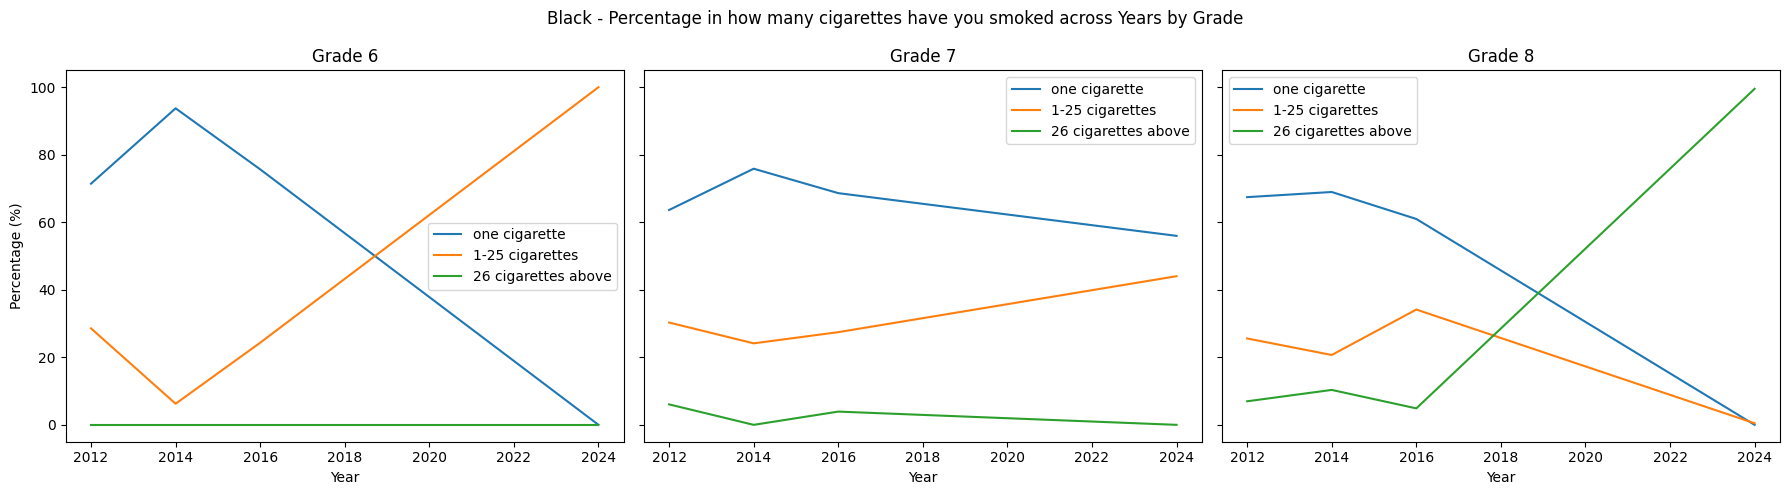

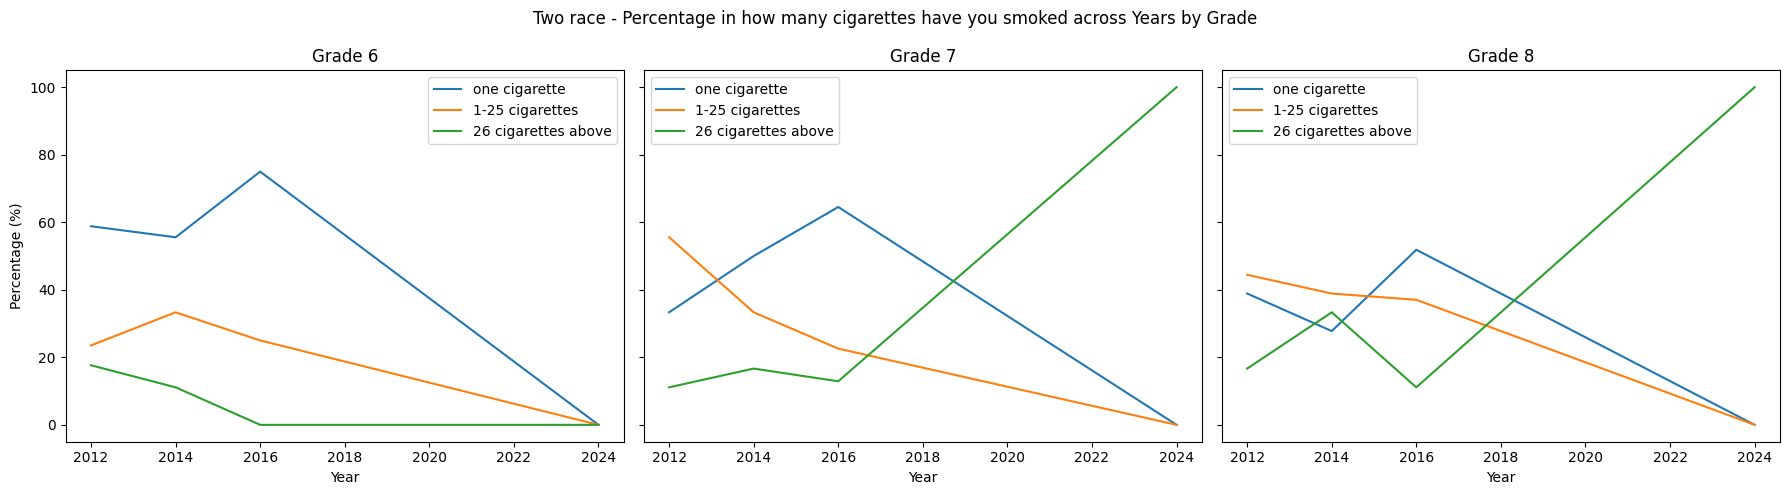

In [33]:
# CR 12
# Filter and process CR12 data
data_2012_filtered_cr12 = data_2012[['CR3', 'CR5', 'CR12']].dropna()
data_2014_filtered_cr12 = data_2014[['CR3', 'CR5', 'CR12']].dropna()
data_2016_filtered_cr12 = data_2016[['CR3', 'CR5', 'CR12']].dropna()
data_2024_filtered_cr12 = data_2024[['CR3', 'CR5', 'CR12']].dropna()

# Add year information for each dataset
data_2012_filtered_cr12['Year'] = 2012
data_2014_filtered_cr12['Year'] = 2014
data_2016_filtered_cr12['Year'] = 2016
data_2024_filtered_cr12['Year'] = 2024

# Combine all filtered datasets
combined_data_cr12 = pd.concat([data_2012_filtered_cr12, data_2014_filtered_cr12, data_2016_filtered_cr12, data_2024_filtered_cr12])

# Apply race mapping
race_mapping = {1: 'Indian', 2: 'Asian', 3: 'Black', 4: 'Hawaii', 5: 'White', 6: 'Hispanic', 7: 'Two race'}
combined_data_cr12['CR5'] = combined_data_cr12['CR5'].map(race_mapping)

# Remove Hawaii and Asian races from the combined dataset
combined_data_filtered_cr12 = combined_data_cr12[(combined_data_cr12['CR5'] != 'Hawaii') & (combined_data_cr12['CR5'] != 'Asian')]

# Apply categorization to CR12
def categorize_cr12(value):
    if value in [2, 3]:
        return 'one cigarette'
    elif value in [4, 5, 6]:
        return '1-25 cigarettes'
    elif value in [7, 8]:
        return '26 cigarettes above'
    else:
        return None  # Exclude values such as '1' or anything unexpected

# Apply the categorization function to CR12 column
combined_data_filtered_cr12['CR12_group'] = combined_data_filtered_cr12['CR12'].apply(categorize_cr12)

# Drop rows where CR12_group is None (exclude CR12 == 1 and others)
combined_data_filtered_cr12 = combined_data_filtered_cr12.dropna(subset=['CR12_group', 'CR5', 'CR3'])

# Function to plot the data
def plot_by_grade(race_data, race_label):
    grades = [1, 2, 3]  # Grade 6, 7, and 8 represented by CR3 as 1, 2, 3
    grade_labels = ['Grade 6', 'Grade 7', 'Grade 8']

    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
    fig.suptitle(f'{race_label} - Percentage in how many cigarettes have you smoked across Years by Grade')

    for i, grade in enumerate(grades):
        grade_data = race_data[race_data['CR3'] == grade]  # Filter specific grade data

        # Calculate the total number of people of this race and grade in each year (denominator)
        total_per_year = grade_data.groupby('Year').size()

        # Calculate the number of people in each CR12 group in each year (numerator)
        group_counts_per_year = grade_data.groupby(['CR12_group', 'Year']).size().unstack().fillna(0)
        group_counts_per_year = group_counts_per_year.reindex(['one cigarette', '1-25 cigarettes', '26 cigarettes above'], fill_value=0)
        # Normalize each group's count by the total number of people in this race/grade per year
        percentage_by_group_year = group_counts_per_year.div(total_per_year, axis=1) * 100

        # Restrict x-axis to only the years 2012, 2014, 2016, 2024
        percentage_by_group_year = percentage_by_group_year.reindex(columns=[2012, 2014, 2016, 2024], fill_value=0)

        # Plot using seaborn for each group
        for group in ['one cigarette', '1-25 cigarettes', '26 cigarettes above']:
            if group in percentage_by_group_year.index:
                sns.lineplot(ax=axes[i], x=[2012, 2014, 2016, 2024],
                             y=percentage_by_group_year.loc[group],
                             label=group)

        axes[i].set_title(grade_labels[i])
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Percentage (%)')
    plt.tight_layout()
    plt.show()

# Plot for Black race
plot_by_grade(combined_data_filtered_cr12[combined_data_filtered_cr12['CR5'] == 'Black'], 'Black')

# Plot for Two race
plot_by_grade(combined_data_filtered_cr12[combined_data_filtered_cr12['CR5'] == 'Two race'], 'Two race')


Result: From above graphs, we observe that over the years, a growing number of two-race at grade 7 and grade 8 youths have shown a tendency to smoke at 26 cigarettes above, while a similar trend is seen among Black grade 8 youths.

CR13: During the past 30 days, on how many days did you smoke cigarettes?
  1. 0 days
  2. 1-2 days
  3. 3-5 days
  4. 6-9 days
  5. 10-19 days
  6. 20 to 29 days
  7. all 30 days

Based on the feature importance graph https://colab.research.google.com/drive/1sQf8LjHUj6b0iyI0LKA6Rr-aZcj9T-29?authuser=1#scrollTo=5hR9Zueiw3Wf&line=1&uniqifier=1, grade has more effect towards the CR13 compared to gender, so here I will use grade as groups.

X-axis (Horizontal Axis): This represents the years, specifically 2012, 2014, 2016, and 2024. It shows the data for these four years, allowing us to track how different groups have changed over time.

Y-axis (Vertical Axis): The Y-axis shows the percentage of respondents. This percentage represents the proportion of people within a specific grade and race who selected a particular CR13 group (e.g., "5- 19 days"). The higher the percentage, the more people in that category chose the specific CR13 group.

Three lines in each chart:

I will drop value 1 because it means youth doesn't smoke.

1-5 days: Represents the respondents who selected values 2，3 in CR13.

5-19 days: Represents the respondents who selected values 4,5 in CR13.

19 days above: Represents the respondents who selected values 6,7 in CR13.


<ipython-input-37-34bc1142c2f5>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_filtered_cr13['CR13_group'] = combined_data_filtered_cr13['CR13'].apply(categorize_cr13)


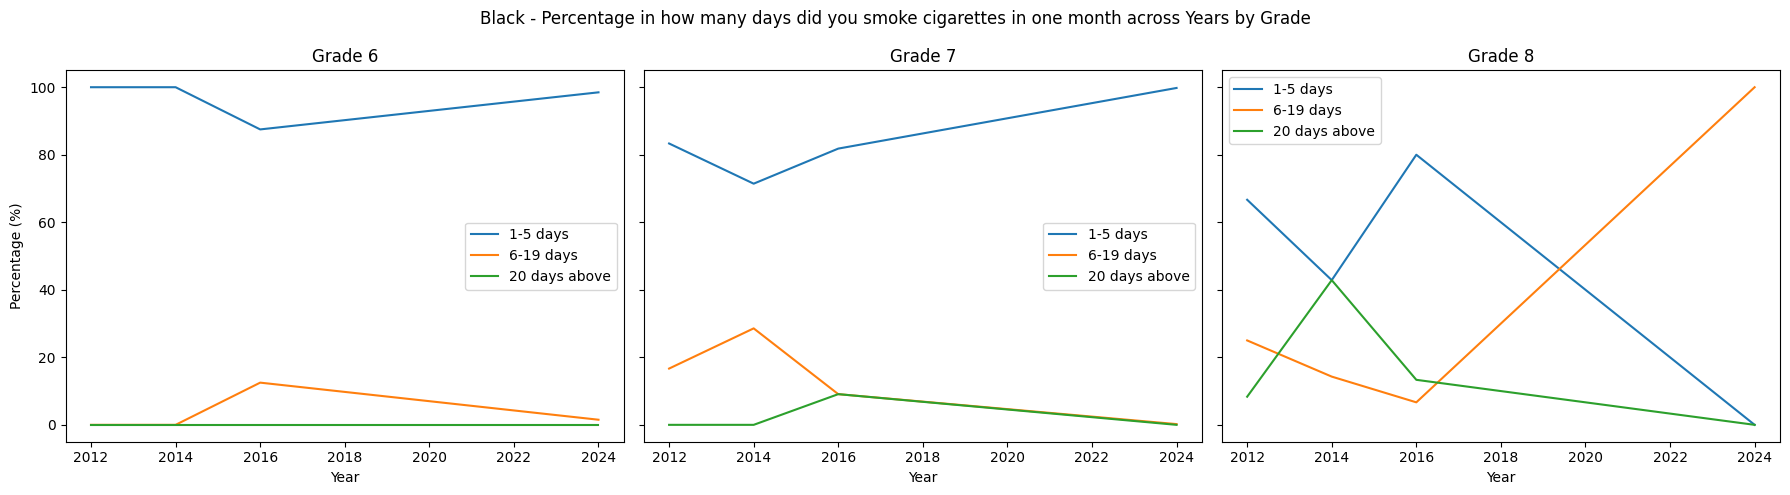

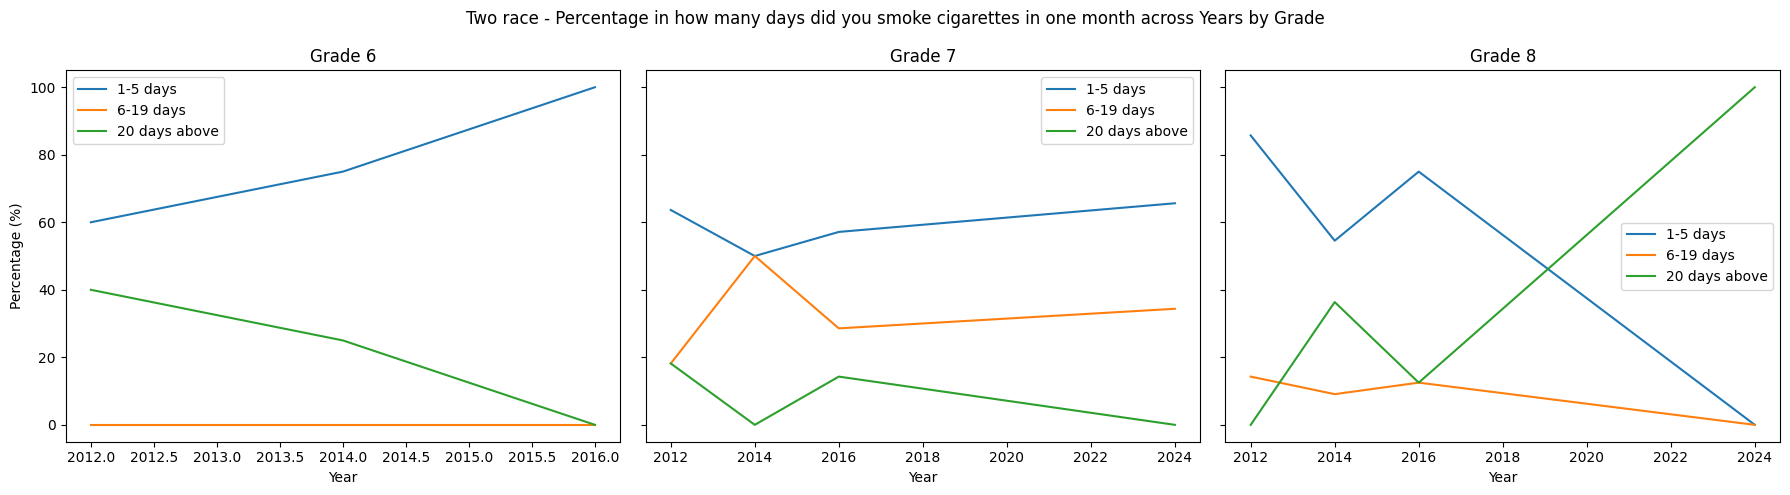

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter and process CR13 data
data_2012_filtered_cr13 = data_2012[['CR3', 'CR5', 'CR13']].dropna()
data_2014_filtered_cr13 = data_2014[['CR3', 'CR5', 'CR13']].dropna()
data_2016_filtered_cr13 = data_2016[['CR3', 'CR5', 'CR13']].dropna()
data_2024_filtered_cr13 = data_2024[['CR3', 'CR5', 'CR13']].dropna()

# Add year information for each dataset
data_2012_filtered_cr13['Year'] = 2012
data_2014_filtered_cr13['Year'] = 2014
data_2016_filtered_cr13['Year'] = 2016
data_2024_filtered_cr13['Year'] = 2024

# Combine all filtered datasets
combined_data_cr13 = pd.concat([data_2012_filtered_cr13, data_2014_filtered_cr13, data_2016_filtered_cr13, data_2024_filtered_cr13])

# Apply race mapping
combined_data_cr13['CR5'] = combined_data_cr13['CR5'].map(race_mapping)

# Remove Hawaii and Asian races from the combined dataset
combined_data_filtered_cr13 = combined_data_cr13[(combined_data_cr13['CR5'] != 'Hawaii') & (combined_data_cr13['CR5'] != 'Asian')]

# Apply categorization to CR13 based on the new grouping
def categorize_cr13(value):
    if value in [2, 3]:
        return '1-5 days'
    elif value in [4, 5]:
        return '6-19 days'
    elif value in [6, 7]:
        return '20 days above'
    else:
        return None  # Exclude value '1'

# Apply the categorization function to CR13 column
combined_data_filtered_cr13['CR13_group'] = combined_data_filtered_cr13['CR13'].apply(categorize_cr13)

# Drop rows where CR13_group is None (exclude CR13 == 1 and others)
combined_data_filtered_cr13 = combined_data_filtered_cr13.dropna(subset=['CR13_group', 'CR5', 'CR3'])

# Function to plot the data
def plot_by_grade(race_data, race_label):
    grades = [1, 2, 3]  # Grade 6, 7, and 8 represented by CR3 as 1, 2, 3
    grade_labels = ['Grade 6', 'Grade 7', 'Grade 8']

    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
    fig.suptitle(f'{race_label} - Percentage in how many days did you smoke cigarettes in one month across Years by Grade')

    for i, grade in enumerate(grades):
        grade_data = race_data[race_data['CR3'] == grade]  # Filter specific grade data

        # Calculate the total number of people of this race and grade in each year (denominator)
        total_per_year = grade_data.groupby('Year').size().reindex([2012, 2014, 2016, 2024], fill_value=0)

        # Calculate the number of people in each CR13 group in each year (numerator)
        group_counts_per_year = grade_data.groupby(['CR13_group', 'Year']).size().unstack().fillna(0)

        # Ensure all groups are present in the index
        group_counts_per_year = group_counts_per_year.reindex(['1-5 days', '6-19 days', '20 days above'], fill_value=0)

        # Normalize each group's count by the total number of people in this race/grade per year
        percentage_by_group_year = group_counts_per_year.div(total_per_year, axis=1) * 100

        # Ensure that all years (2012, 2014, 2016, 2024) are represented and fill missing values with 0
        percentage_by_group_year = percentage_by_group_year.reindex(columns=[2012, 2014, 2016, 2024], fill_value=0)

        # Plot using seaborn for each group
        for group in ['1-5 days', '6-19 days', '20 days above']:
            sns.lineplot(ax=axes[i], x=percentage_by_group_year.columns,
                         y=percentage_by_group_year.loc[group],
                         label=group)

        axes[i].set_title(grade_labels[i])
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Percentage (%)')
    plt.tight_layout()
    plt.show()

# Plot for Black race
plot_by_grade(combined_data_filtered_cr13[combined_data_filtered_cr13['CR5'] == 'Black'], 'Black')

# Plot for Two race
plot_by_grade(combined_data_filtered_cr13[combined_data_filtered_cr13['CR5'] == 'Two race'], 'Two race')



Result: From above graphs, we observe that over the years, a growing number of two-race at grade 8 youths have shown a tendency to smoke over 20 days in a month, while a growing number of black at grade 8 youths have shown a tendency to smoke 6-19 days in a month.

CR23: During the past 30 days, on how many days did you smoke cigars, cigarillos, or little cigars?
  1. 0 days
  2. 1-2 days
  3. 3-5 days
  4. 6-9 days
  5. 10-19 days
  6. 20 to 29 days
  7. all 30 days

Based on the feature importance graph https://colab.research.google.com/drive/1sQf8LjHUj6b0iyI0LKA6Rr-aZcj9T-29?authuser=1#scrollTo=5hR9Zueiw3Wf&line=1&uniqifier=1, gender has more effect towards the CR23 compared to grade, so here I will use gender as groups.

X-axis (Horizontal Axis): This represents the years, specifically 2012, 2014, 2016, and 2024. It shows the data for these four years, allowing us to track how different groups have changed over time.

Y-axis (Vertical Axis): The Y-axis shows the percentage of respondents. This percentage represents the proportion of people within a specific gender and race who selected a particular CR23 group (e.g., "10- 19 days"). The higher the percentage, the more people in that category chose the specific CR23 group.

Three lines in each chart:

I will drop value 1 because it means youth doesn't smoke.

1-9 days: Represents the respondents who selected values 2，3,4 in CR23.

10-19 days: Represents the respondents who selected values 5 in CR23.

19 days above: Represents the respondents who selected values 6,7 in CR23.


<ipython-input-59-f9295cf3237d>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_filtered_cr23['CR23_group'] = combined_data_filtered_cr23['CR23'].apply(categorize_cr23)


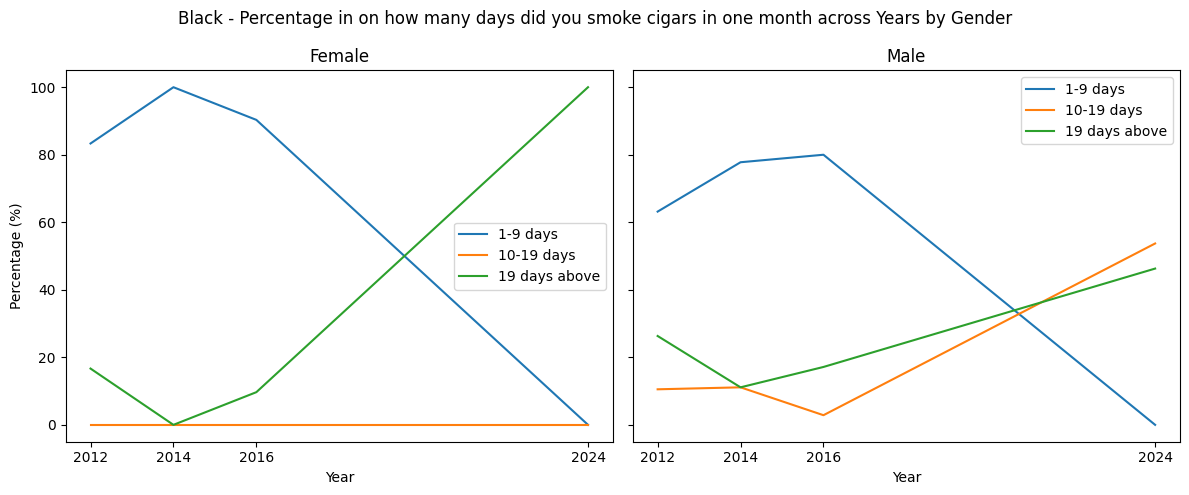

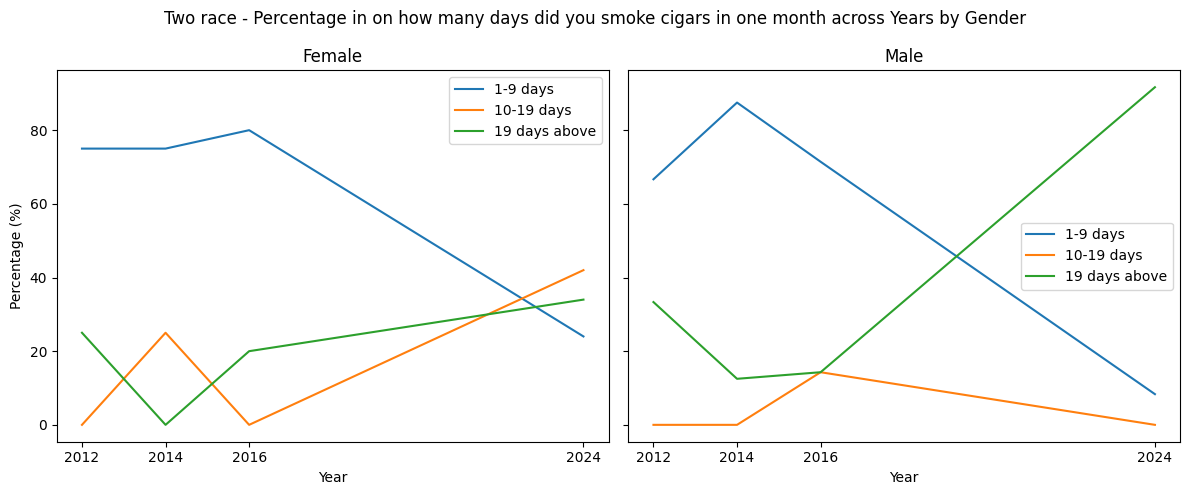

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter and process CR23 data
data_2012_filtered_cr23 = data_2012[['CR2', 'CR5', 'CR23']].dropna()
data_2014_filtered_cr23 = data_2014[['CR2', 'CR5', 'CR23']].dropna()
data_2016_filtered_cr23 = data_2016[['CR2', 'CR5', 'CR23']].dropna()
data_2024_filtered_cr23 = data_2024[['CR2', 'CR5', 'CR23']].dropna()

# Add year information for each dataset
data_2012_filtered_cr23['Year'] = 2012
data_2014_filtered_cr23['Year'] = 2014
data_2016_filtered_cr23['Year'] = 2016
data_2024_filtered_cr23['Year'] = 2024

# Combine all filtered datasets
combined_data_cr23 = pd.concat([data_2012_filtered_cr23, data_2014_filtered_cr23, data_2016_filtered_cr23, data_2024_filtered_cr23])

# Apply race mapping
combined_data_cr23['CR5'] = combined_data_cr23['CR5'].map(race_mapping)

# Remove Hawaii and Asian races from the combined dataset
combined_data_filtered_cr23 = combined_data_cr23[(combined_data_cr23['CR5'] != 'Hawaii') & (combined_data_cr23['CR5'] != 'Asian')]

# Apply categorization to CR23 based on the new grouping
def categorize_cr23(value):
    if value in [2, 3, 4]:
        return '1-9 days'
    elif value == 5:
        return '10-19 days'
    elif value in [6, 7]:
        return '19 days above'
    else:
        return None  # Exclude value '1'

# Apply the categorization function to CR23 column
combined_data_filtered_cr23['CR23_group'] = combined_data_filtered_cr23['CR23'].apply(categorize_cr23)

# Drop rows where CR23_group is None (exclude CR23 == 1 and others)
combined_data_filtered_cr23 = combined_data_filtered_cr23.dropna(subset=['CR23_group', 'CR5', 'CR2'])

# Function to plot the data
def plot_by_gender(race_data, race_label):
    genders = [1, 2]  # 1: Female, 2: Male represented by CR2
    gender_labels = ['Female', 'Male']

    fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)
    fig.suptitle(f'{race_label} - Percentage in on how many days did you smoke cigars in one month across Years by Gender')

    for i, gender in enumerate(genders):
        gender_data = race_data[race_data['CR2'] == gender]  # Filter specific gender data

        # Calculate the total number of people of this race and gender in each year (denominator)
        total_per_year = gender_data.groupby('Year').size().reindex([2012, 2014, 2016, 2024], fill_value=0)

        # Calculate the number of people in each CR23 group in each year (numerator)
        group_counts_per_year = gender_data.groupby(['CR23_group', 'Year']).size().unstack().fillna(0)

        # Ensure all groups are present in the index
        group_counts_per_year = group_counts_per_year.reindex(['1-9 days', '10-19 days', '19 days above'], fill_value=0)

        # Normalize each group's count by the total number of people in this race/gender per year
        percentage_by_group_year = group_counts_per_year.div(total_per_year, axis=1) * 100

        # Ensure that all years (2012, 2014, 2016, 2024) are represented and fill missing values with 0
        percentage_by_group_year = percentage_by_group_year.reindex(columns=[2012, 2014, 2016, 2024], fill_value=0)

        # Plot using seaborn for each group
        for group in ['1-9 days', '10-19 days', '19 days above']:
            sns.lineplot(ax=axes[i], x=percentage_by_group_year.columns,
                         y=percentage_by_group_year.loc[group],
                         label=group)

        # Set the x-ticks to only show the specific years
        axes[i].set_xticks([2012, 2014, 2016, 2024])

        axes[i].set_title(gender_labels[i])
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Percentage (%)')

    plt.tight_layout()
    plt.show()

# Plot for Black race
plot_by_gender(combined_data_filtered_cr23[combined_data_filtered_cr23['CR5'] == 'Black'], 'Black')

# Plot for Two race
plot_by_gender(combined_data_filtered_cr23[combined_data_filtered_cr23['CR5'] == 'Two race'], 'Two race')



Result: From above graphs, we observe that over the years, a growing poportional of two-race male youths have shown a tendency to smoke over 20 days in a month, while a growing poportional of black female youths have shown a tendency to smoke over 20 days in a month.

CR54: Do you want to stop smoking cigarettes for good?
  1. I do not smoke now
  2. Yes
  3. No

Based on the feature importance graph https://colab.research.google.com/drive/1sQf8LjHUj6b0iyI0LKA6Rr-aZcj9T-29?authuser=1#scrollTo=5hR9Zueiw3Wf&line=1&uniqifier=1, grade has more effect towards the CR23 compared to gender, so here I will use grade as groups.

X-axis (Horizontal Axis): This represents the years, specifically 2012, 2014, 2016, and 2024. It shows the data for these four years, allowing us to track how different groups have changed over time.

Y-axis (Vertical Axis): The Y-axis shows the percentage of respondents. This percentage represents the proportion of people within a specific grade and race who selected a particular CR54 group (e.g., "Yes"). The higher the percentage, the more people in that category chose the specific CR54 group.

Three lines in each chart:

I will drop value 1 because it means youth doesn't smoke.

Yes: Represents the respondents who selected values 2 in CR54.

No: Represents the respondents who selected values 3 in CR54.


<ipython-input-60-352f84d5e101>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  combined_data_filtered_cr54['CR54_group'] = combined_data_filtered_cr54['CR54'].apply(categorize_cr54)


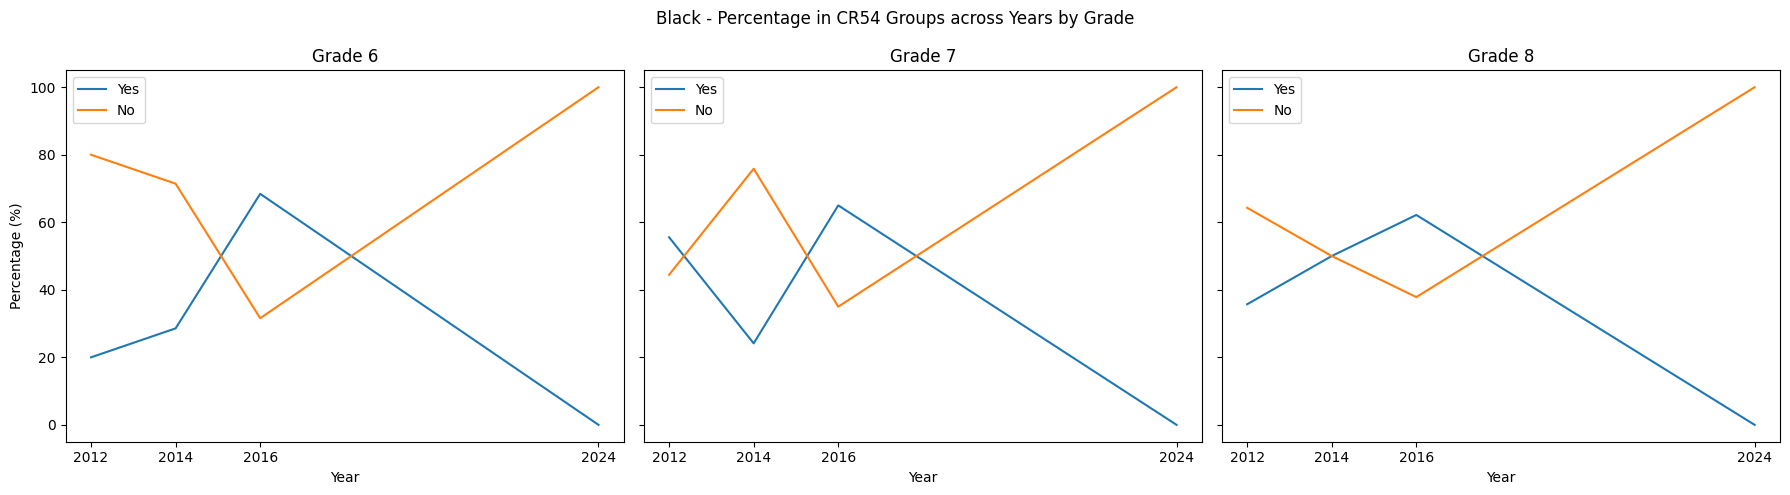

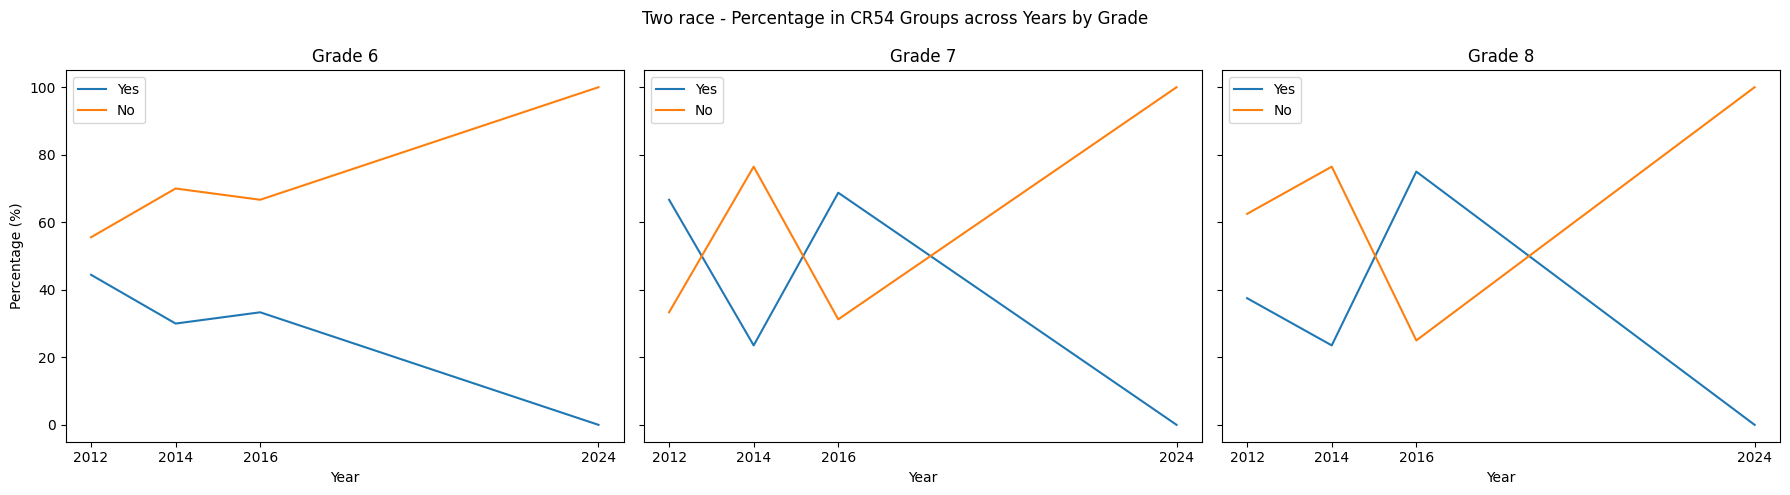

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter and process CR54 data
data_2012_filtered_cr54 = data_2012[['CR3', 'CR5', 'CR54']].dropna()
data_2014_filtered_cr54 = data_2014[['CR3', 'CR5', 'CR54']].dropna()
data_2016_filtered_cr54 = data_2016[['CR3', 'CR5', 'CR54']].dropna()
data_2024_filtered_cr54 = data_2024[['CR3', 'CR5', 'CR54']].dropna()

# Add year information for each dataset
data_2012_filtered_cr54['Year'] = 2012
data_2014_filtered_cr54['Year'] = 2014
data_2016_filtered_cr54['Year'] = 2016
data_2024_filtered_cr54['Year'] = 2024

# Combine all filtered datasets
combined_data_cr54 = pd.concat([data_2012_filtered_cr54, data_2014_filtered_cr54, data_2016_filtered_cr54, data_2024_filtered_cr54])

# Apply race mapping
combined_data_cr54['CR5'] = combined_data_cr54['CR5'].map(race_mapping)

# Remove Hawaii and Asian races from the combined dataset
combined_data_filtered_cr54 = combined_data_cr54[(combined_data_cr54['CR5'] != 'Hawaii') & (combined_data_cr54['CR5'] != 'Asian')]

# Apply categorization to CR54 based on the new grouping
def categorize_cr54(value):
    if value == 2:
        return 'Yes'
    elif value == 3:
        return 'No'
    else:
        return None  # Exclude value '1'

# Apply the categorization function to CR54 column
combined_data_filtered_cr54['CR54_group'] = combined_data_filtered_cr54['CR54'].apply(categorize_cr54)

# Drop rows where CR54_group is None (exclude CR54 == 1 and others)
combined_data_filtered_cr54 = combined_data_filtered_cr54.dropna(subset=['CR54_group', 'CR5', 'CR3'])

# Function to plot the data
def plot_by_grade(race_data, race_label):
    grades = [1, 2, 3]  # Grade 6, 7, and 8 represented by CR3 as 1, 2, 3
    grade_labels = ['Grade 6', 'Grade 7', 'Grade 8']

    fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)
    fig.suptitle(f'{race_label} - Percentage in CR54 Groups across Years by Grade')

    for i, grade in enumerate(grades):
        grade_data = race_data[race_data['CR3'] == grade]  # Filter specific grade data

        # Calculate the total number of people of this race and grade in each year (denominator)
        total_per_year = grade_data.groupby('Year').size().reindex([2012, 2014, 2016, 2024], fill_value=0)

        # Calculate the number of people in each CR54 group in each year (numerator)
        group_counts_per_year = grade_data.groupby(['CR54_group', 'Year']).size().unstack().fillna(0)

        # Ensure all groups are present in the index
        group_counts_per_year = group_counts_per_year.reindex(['Yes', 'No'], fill_value=0)

        # Normalize each group's count by the total number of people in this race/grade per year
        percentage_by_group_year = group_counts_per_year.div(total_per_year, axis=1) * 100

        # Ensure that all years (2012, 2014, 2016, 2024) are represented and fill missing values with 0
        percentage_by_group_year = percentage_by_group_year.reindex(columns=[2012, 2014, 2016, 2024], fill_value=0)

        # Plot using seaborn for each group
        for group in ['Yes', 'No']:
            sns.lineplot(ax=axes[i], x=percentage_by_group_year.columns,
                         y=percentage_by_group_year.loc[group],
                         label=group)

        # Set the x-ticks to only show the specific years
        axes[i].set_xticks([2012, 2014, 2016, 2024])

        axes[i].set_title(grade_labels[i])
        axes[i].set_xlabel('Year')
        axes[i].set_ylabel('Percentage (%)')

    plt.tight_layout()
    plt.show()

# Plot for Black race
plot_by_grade(combined_data_filtered_cr54[combined_data_filtered_cr54['CR5'] == 'Black'], 'Black')

# Plot for Two race
plot_by_grade(combined_data_filtered_cr54[combined_data_filtered_cr54['CR5'] == 'Two race'], 'Two race')


Result: From above graphs, we observe that over the years, a growing porpotional of two-race and black youth has tendency to not stop smoking.